<a href="https://colab.research.google.com/github/morphingdesign/tfExplore/blob/master/TF_Process_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('whitegrid')

# Read in Data

Data is from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

In [35]:
df = pd.read_csv("sample_data/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# EDA

## Investigate Missing Data

In [37]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Confirmed; no missing data.

## Overall Statistics

In [38]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


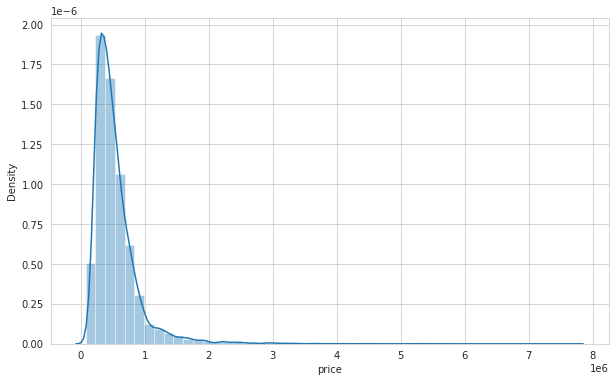

In [39]:
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


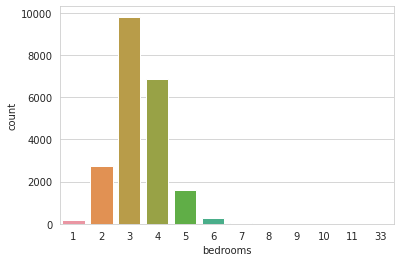

In [40]:
sns.countplot(df['bedrooms'])

Note the outlier with 33 bedrooms.

In [41]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

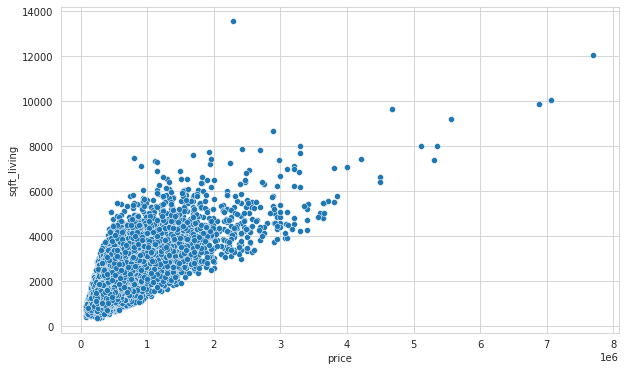

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sqft_living', data=df)

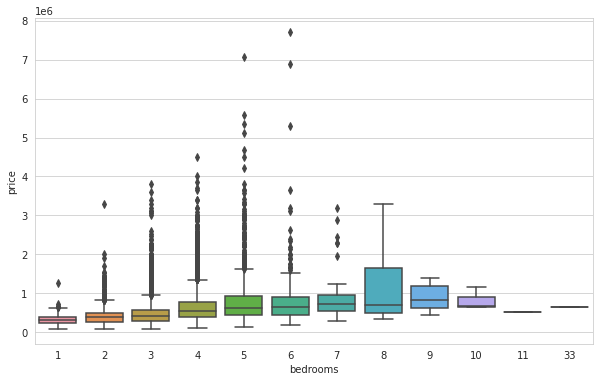

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

Use 'lat' and 'long' to map out house sale locations and get price distribution across region.

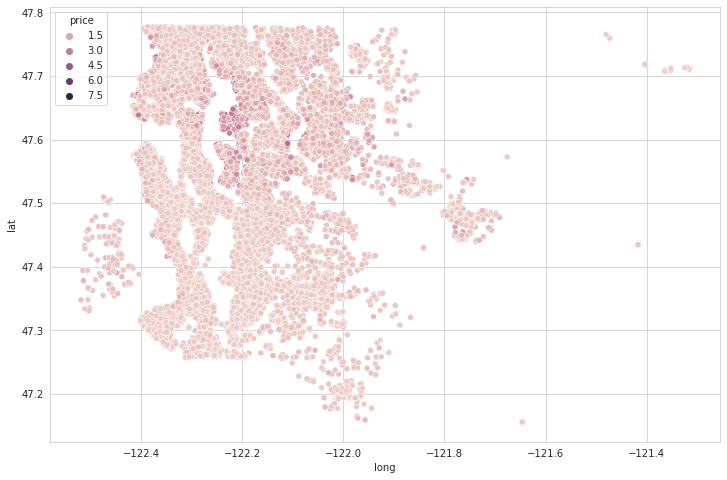

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

Outliers are skewing visualization. Remove top 1% house prices. The previous iteration of this model building process and evaluation showed that the few outliers of expensive houses impacted the model's performance, so this new dataframe without the top 1% of data entries is instead being used for the rest of this project.

In [45]:
len(df) * 0.01

215.97

In [46]:
df_99 = df.sort_values('price', ascending=False).iloc[216:]
df_99.sort_values('price', ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


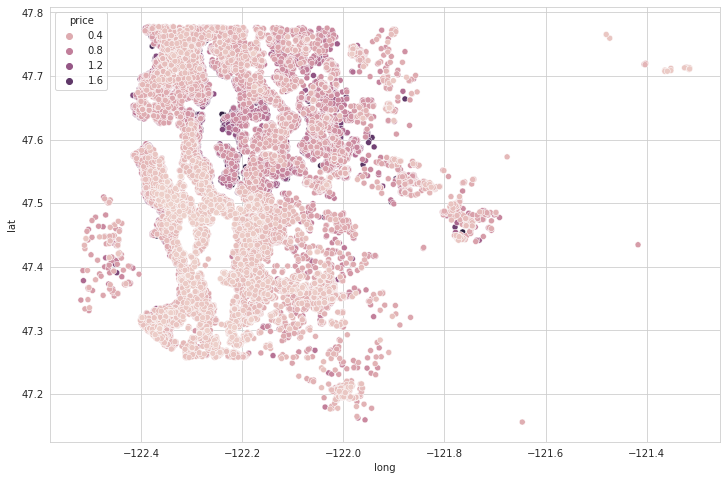

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df_99, hue='price')

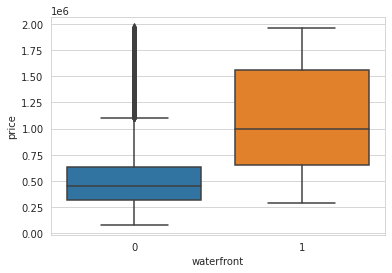

In [48]:
sns.boxplot(x='waterfront', y='price', data=df_99)

# Feature Engineering

In [49]:
df_99.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


## Drop Inapplicable Data

In [50]:
df_99 = df_99.drop('id', axis=1)

## Convert Feature Types

In [52]:
df_99['date']

6329       6/2/2014
12271    10/15/2014
9166      2/13/2015
12565     4/22/2015
1150      4/21/2015
            ...    
2139       5/8/2014
8267      11/5/2014
16184     3/24/2015
465       5/23/2014
15279      5/6/2014
Name: date, Length: 21381, dtype: object

In [53]:
df_99['date'] = pd.to_datetime(df_99['date'])
df_99['date']

6329    2014-06-02
12271   2014-10-15
9166    2015-02-13
12565   2015-04-22
1150    2015-04-21
           ...    
2139    2014-05-08
8267    2014-11-05
16184   2015-03-24
465     2014-05-23
15279   2014-05-06
Name: date, Length: 21381, dtype: datetime64[ns]

## Extract New Features

In [54]:
df_99['year'] = df_99['date'].apply(lambda date: date.year)
df_99['month'] = df_99['date'].apply(lambda date: date.month)
df_99.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347,2014,6
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486,2014,10
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560,2015,2
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237,2015,4
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868,2015,4


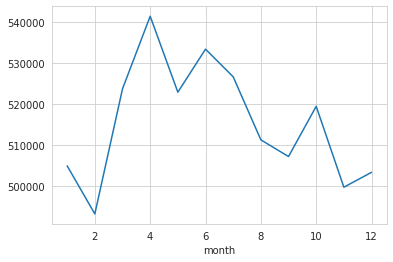

In [55]:
df_99.groupby('month').mean()['price'].plot()

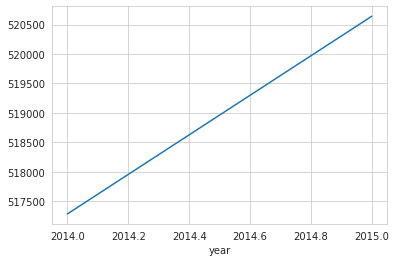

In [56]:
df_99.groupby('year').mean()['price'].plot()

In [57]:
df_99 = df_99.drop('date', axis=1)

## Continuous v. Categorical Features

In [58]:
df_99['zipcode'].value_counts()

98103    602
98038    589
98115    582
98052    573
98117    553
        ... 
98010    100
98102     99
98024     80
98148     57
98039     29
Name: zipcode, Length: 70, dtype: int64

## Analyzing Features

In [59]:
df_99['yr_renovated'].value_counts()

0       20499
2014       91
2013       36
2007       34
2000       34
        ...  
1959        1
1954        1
1948        1
1944        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [60]:
df_99['sqft_basement'].value_counts()

0       13052
600       219
700       214
500       214
800       205
        ...  
2610        1
2850        1
915         1
20          1
1135        1
Name: sqft_basement, Length: 292, dtype: int64

# Data Pre-Processing

Convert features and labels from Pandas Series/DataFrame to NumPy arrays.

In [76]:
X = df_99.drop('price', axis=1).values
y = df_99['price'].values

## Train/Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## Scaling

Scale data only after train/test split.

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)

Only transform the test data; do not fit.

In [82]:
X_test = scaler.transform(X_test)

# Create Model

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Specify Neurons & Layers

In [84]:
X_train.shape

(14966, 20)

Data has 20 features, so 20 neurons per layer.

## Construct & Compile Model

In [85]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train Model

In [86]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test), 
          batch_size=128, epochs=400)

Epoch 1/400
117/117 [==============================] - 1s 3ms/step - loss: 349591792761.4915 - val_loss: 354744205312.0000
Epoch 2/400
117/117 [==============================] - 0s 2ms/step - loss: 344739230737.3560 - val_loss: 348087713792.0000
Epoch 3/400
117/117 [==============================] - 0s 2ms/step - loss: 335702650255.1865 - val_loss: 286256005120.0000
Epoch 4/400
117/117 [==============================] - 0s 2ms/step - loss: 245232148063.4576 - val_loss: 122550165504.0000
Epoch 5/400
117/117 [==============================] - 0s 2ms/step - loss: 89635657415.5932 - val_loss: 57595305984.0000
Epoch 6/400
117/117 [==============================] - 0s 2ms/step - loss: 54252691629.5593 - val_loss: 55892377600.0000
Epoch 7/400
117/117 [==============================] - 0s 2ms/step - loss: 52384268791.3220 - val_loss: 54825340928.0000
Epoch 8/400
117/117 [==============================] - 0s 2ms/step - loss: 52031419756.4746 - val_loss: 53726199808.0000
Epoch 9/400
117/117 [===

# Evaluation

## Loss History

In [87]:
model.history.history

{'loss': [347754070016.0,
  345912311808.0,
  319026790400.0,
  203610423296.0,
  73272434688.0,
  54193389568.0,
  53097390080.0,
  52032614400.0,
  50949107712.0,
  49843408896.0,
  48697188352.0,
  47555203072.0,
  46352601088.0,
  45140750336.0,
  43886297088.0,
  42628337664.0,
  41322225664.0,
  40016162816.0,
  38704914432.0,
  37390807040.0,
  36104982528.0,
  34846138368.0,
  33650761728.0,
  32552548352.0,
  31518855168.0,
  30576680960.0,
  29738977280.0,
  28992688128.0,
  28305303552.0,
  27695564800.0,
  27174303744.0,
  26655113216.0,
  26218790912.0,
  25849952256.0,
  25487761408.0,
  25176606720.0,
  24945598464.0,
  24676069376.0,
  24462071808.0,
  24273926144.0,
  24101345280.0,
  23959382016.0,
  23828174848.0,
  23708379136.0,
  23554711552.0,
  23439630336.0,
  23328735232.0,
  23203774464.0,
  23114240000.0,
  23022321664.0,
  22967236608.0,
  22854170624.0,
  22786951168.0,
  22683834368.0,
  22586269696.0,
  22522507264.0,
  22416764928.0,
  22360944640.0,
  

In [88]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.477541e+11,3.547442e+11
1,3.459123e+11,3.480877e+11
2,3.190268e+11,2.862560e+11
3,2.036104e+11,1.225502e+11
4,7.327243e+10,5.759531e+10
...,...,...
395,1.864832e+10,1.958963e+10
396,1.863248e+10,1.969279e+10
397,1.862403e+10,1.958597e+10
398,1.861700e+10,1.957164e+10


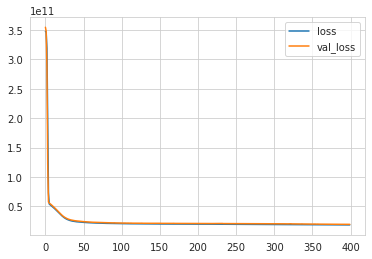

In [89]:
losses.plot()

## Test Data & Metrics

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [92]:
predictions = model.predict(X_test)
predictions

array([[521464.28],
       [641720.56],
       [465008.47],
       ...,
       [273202.12],
       [528081.4 ],
       [480247.3 ]], dtype=float32)

### MSE

In [93]:
mean_squared_error(y_test, predictions)

19577184563.709644

### RMSE

In [94]:
np.sqrt(mean_squared_error(y_test, predictions))

139918.49257231742

### MAE

In [95]:
mean_absolute_error(y_test, predictions)

93900.99369325586

In [96]:
df_99['price'].describe()

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

### Explained Variance Score

In [97]:
help(explained_variance_score)

Help on function explained_variance_score in module sklearn.metrics._regression:

explained_variance_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')
    Explained variance regression score function
    
    Best possible score is 1.0, lower values are worse.
    
    Read more in the :ref:`User Guide <explained_variance_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average',                 'variance_weighted'] or array-like of shape (n_outputs)
        Defines aggregating of multiple output scores.
        Array-like value defines weights used to average scores.
    
        'raw_values' :
  

In [98]:
explained_variance_score(y_test, predictions)

0.7648303670211238

## Visualization

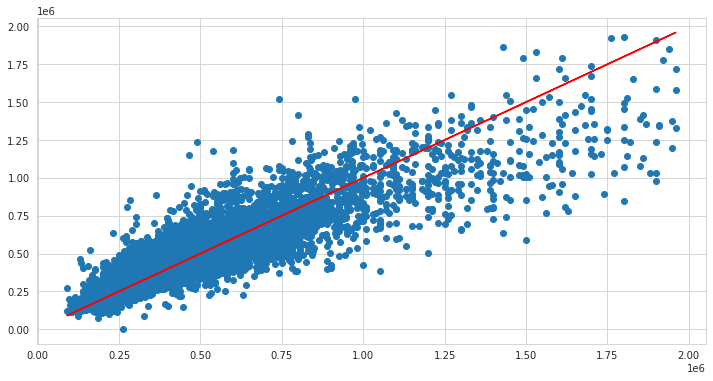

In [99]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

---